# 2D Geometric Transformations (Translation)

In this example we will use geometric transformations to register two remote sensing images acquired using Sentinel-2 images on two different dates (15 August 2021 and 25 August 2021).

## Change working directory (can also be changed from terminal if working locally)

Change working directory to directory containing the notebook and images (e.g. is using Google Colab)

In [6]:
# Terminal-based dictionary 

## Load and display images

"\n cmap='gray' refering to the color map of the image \n\n However the image is in 3 channels, so mathplotlib will ignore the cmap='gray' and display the image in color\n\n "

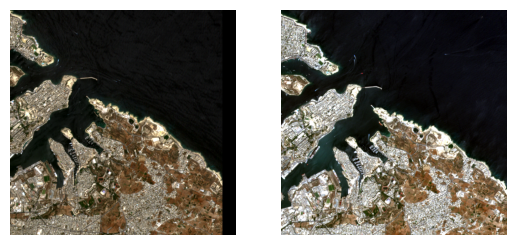

In [7]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt

filename1 = 'img1.png'
filename2 = 'img2.png'

# Load the images
I1 = imageio.imread(filename1)
I2 = imageio.imread(filename2)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(I1,cmap='gray') 
plt.axis('off')

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(I2,cmap='gray')

"""
 cmap='gray' refering to the color map of the image 

 However the image is in 3 channels, so mathplotlib will ignore the cmap='gray' and display the image in color

 """



Note that the images are not well registered and there is both a vertical and horizontal displacement.

In this experiment we know that the displacement is around 30 pixels in the horizontal direction (x) and 20 pixels in the vertical direction (y).

## Find amount of displacement in both directions

In [8]:
from skimage.registration import phase_cross_correlation
import cv2

# Get the images in grayscale, since we are not interested in the colour component
I1gray = cv2.cvtColor(I1, cv2.COLOR_RGB2GRAY)
I2gray = cv2.cvtColor(I2, cv2.COLOR_RGB2GRAY)

# Compute the shift between the two images
# Define the input such that images will be registered to within 1/100 of a pixel
shift, error, phasediff = phase_cross_correlation(I1gray, I2gray, upsample_factor=100)

print('The images are misregistered (y, x): {}'.format(shift))


The images are misregistered (y, x): [-19.88 -30.01]


The phase cross correlation is a method that can be used to find the translations between two images when the translations are unknown.

Note that this method is robust to the difference in illumination between the two images.

Documentation: https://scikit-image.org/docs/stable/api/skimage.registration.html#skimage.registration.phase_cross_correlation

## Translate image 2 such that it is aligned with image 1

In [9]:
import numpy as np

I = np.float32([[1, 0], [0, 1]])

# Derive the translation matrix using the shift values T = [I*t]
T = np.float32([[1, 0, shift[1]], [0, 1, shift[0]]])

print('The translation matrix T:')
print(T)

The translation matrix T:
[[  1.     0.   -30.01]
 [  0.     1.   -19.88]]


The images are misregistered (y, x): [ 0.02 -0.01]


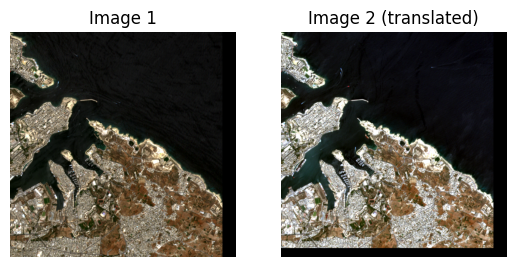

In [10]:
# Translate the image and resample using Lanczos resampling

# Use help(cv2.warpAffine) to get information on OpenCV's Affine warping function, or go to: https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983
I2T = cv2.warpAffine(I2, T, I2.shape[:2], flags=cv2.INTER_LANCZOS4)

plt.figure()

plt.subplot(1,2,1)
plt.imshow(I1,cmap='gray')
plt.title('Image 1')
plt.axis('off')

plt.subplot(1,2,2)
plt.axis('off')
plt.title('Image 2 (translated)')
plt.imshow(I2T,cmap='gray')

# Recalculate the cross-correlation between the original and translated image
shift, error, phasediff = phase_cross_correlation(I1gray, cv2.cvtColor(I2T, cv2.COLOR_RGB2GRAY), upsample_factor=100)

print('The images are misregistered (y, x): {}'.format(shift))
